<a href="https://colab.research.google.com/github/AsutoshDalei/Deep-Neural-Networks/blob/master/Academic_Performamce_in_Exams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Students Performance in Exams
### Marks secured by the students in various subjects.

We aim to understand how a student scores in 3 subjects, **Mathematics, Reading and Writing**.

We take into consideration several factors that may influnce their performance.

Importing the necessary libraries and the dataset.

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.utils import shuffle

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [0]:
df=pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
print(df.shape)
df.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Here, we see that we have 0 null instances in our dataset, indicating a clean data.

We do have 5 object datadtypes that shall be encoded into binary form.

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Here, we note down the columns that have object as datatype instances and numerical datatype instances.

In [0]:
objcol=df.columns[df.dtypes=='object']
numcol=df.columns[df.dtypes!='object']

We look into the unique features in the object based columns

In [0]:
for i in objcol:
    print(i+':')
    print(pd.unique(df[i]))
    print()
    

gender:
['female' 'male']

race/ethnicity:
['group B' 'group C' 'group A' 'group D' 'group E']

parental level of education:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch:
['standard' 'free/reduced']

test preparation course:
['none' 'completed']



We verify we if really do not have any null instances in our dataset.

In [0]:
df[df.isnull().any(axis=1)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score



## Visualization

We visualize how the columns are distributed on comparison to a child's math score

In [0]:
dfvis=df.copy()

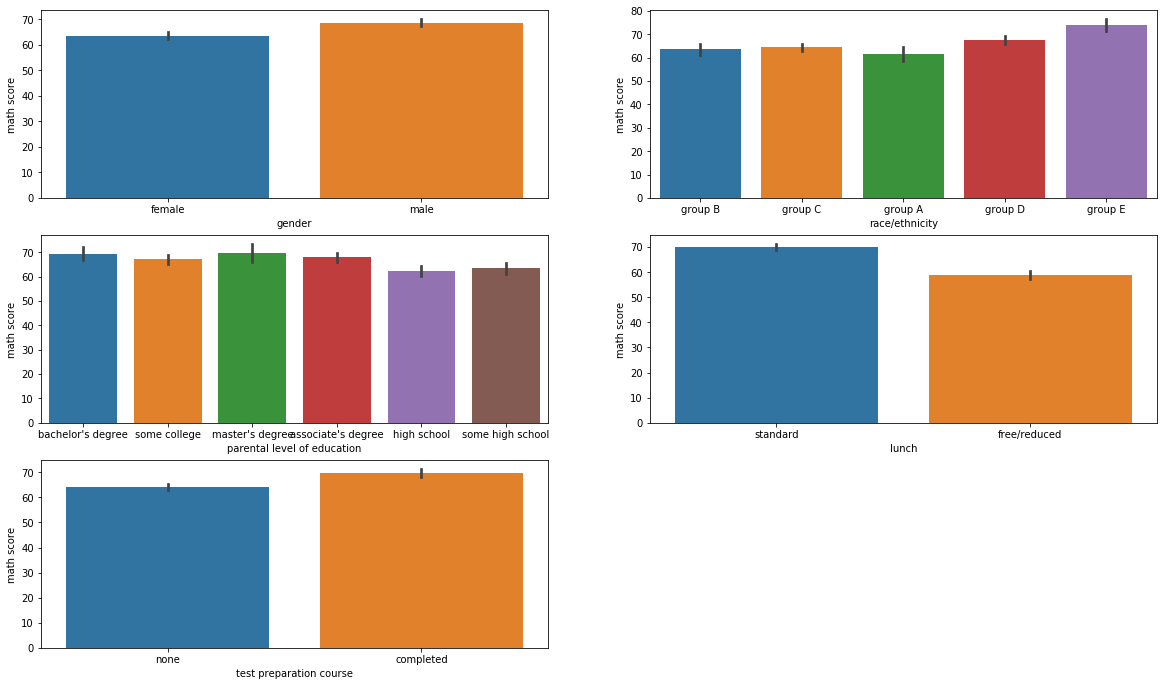

In [0]:
_,_=plt.subplots(figsize=(20,20))
for i in range(len(objcol)):
    name=objcol[i]
    plt.subplot(objcol.shape[0],2,i+1)
    sns.barplot(x=dfvis[name],y=dfvis['math score'])
plt.show()    

Visualizing based on the writing marks performance

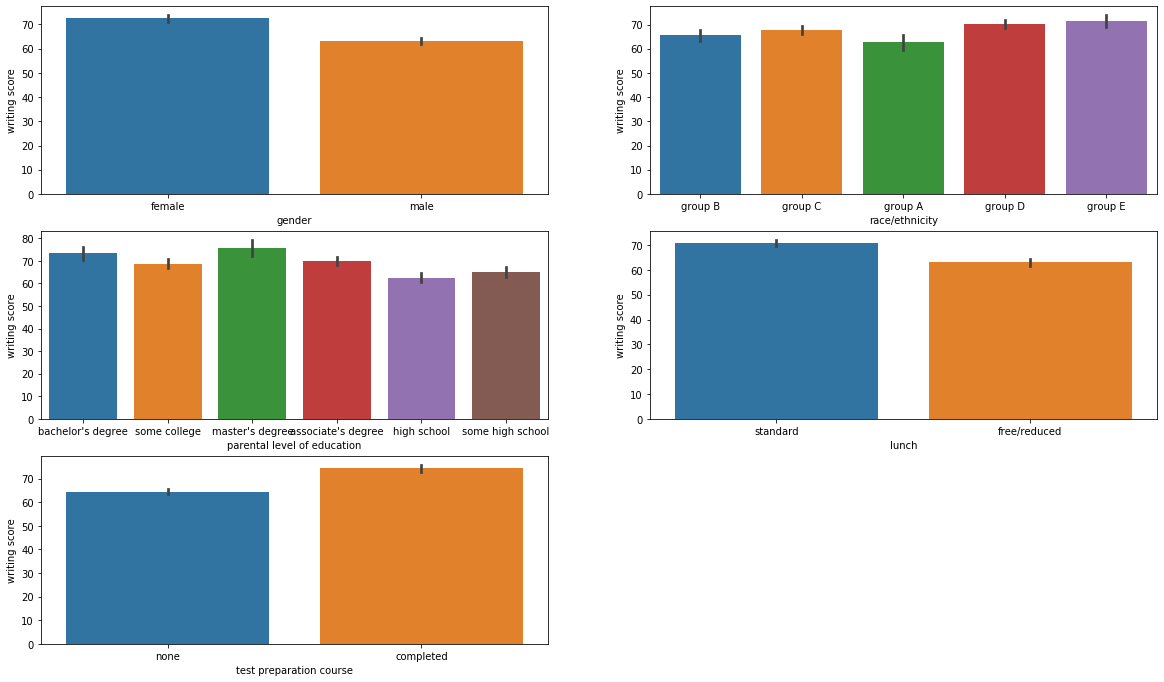

In [0]:
_,_=plt.subplots(figsize=(20,20))
for i in range(len(objcol)):
    name=objcol[i]
    plt.subplot(objcol.shape[0],2,i+1)
    sns.barplot(x=dfvis[name],y=dfvis['writing score'])
plt.show()    

Visualizing based on the reading marks performance

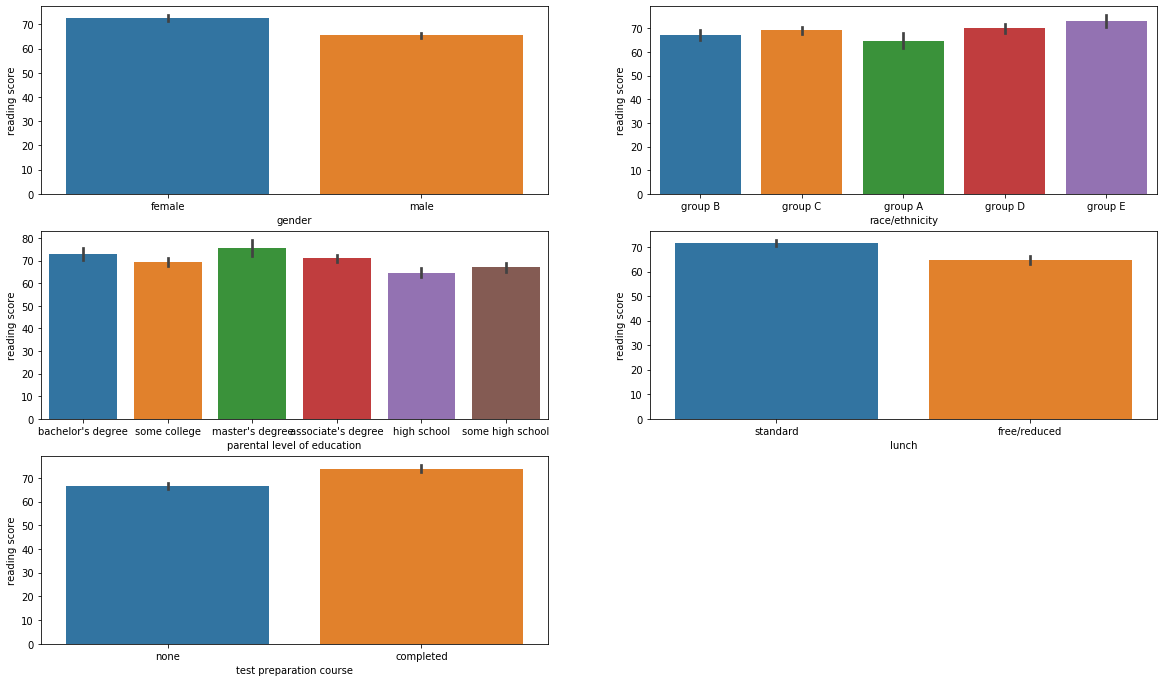

In [0]:
_,_=plt.subplots(figsize=(20,20))
for i in range(len(objcol)):
    name=objcol[i]
    plt.subplot(objcol.shape[0],2,i+1)
    sns.barplot(x=dfvis[name],y=dfvis['reading score'])
plt.show()    

This visualization shows how the mathematics, reading and writing marks are distributed.

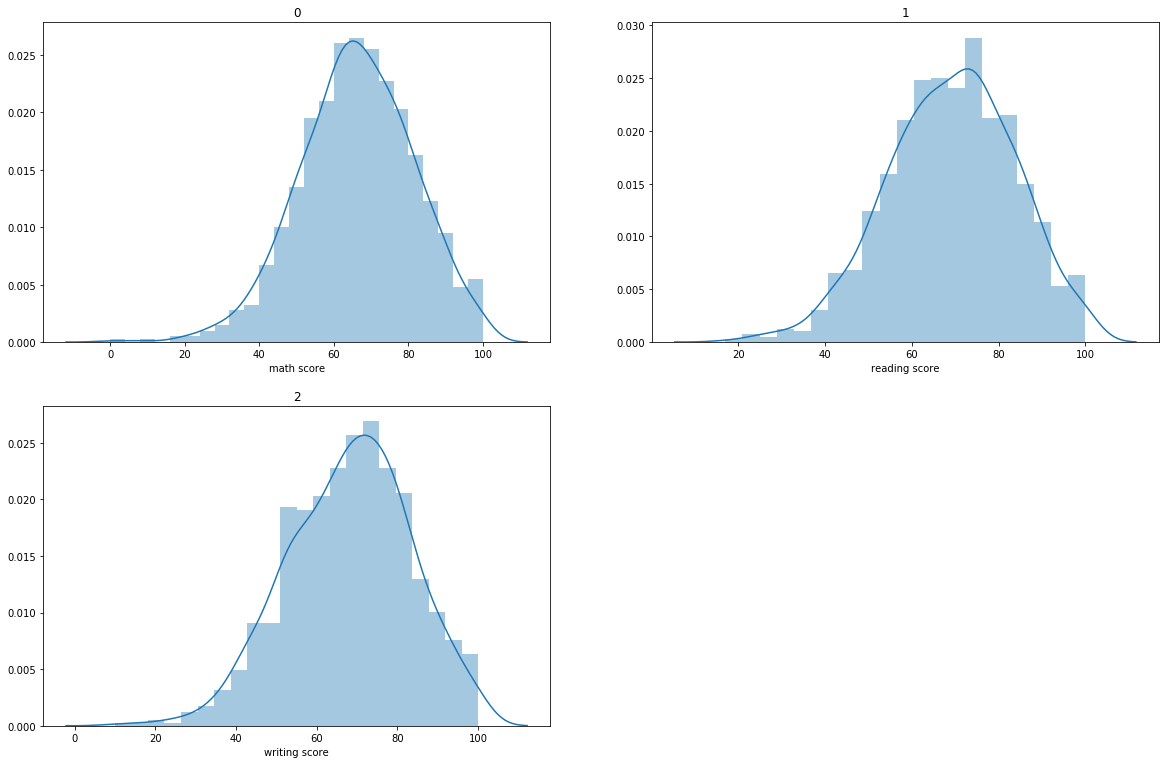

In [0]:
_,_=plt.subplots(figsize=(20,20))
for i in range(len(numcol)):
    name=numcol[i]
    plt.subplot(numcol.shape[0],2,i+1)
    sns.distplot(a=dfvis[name])
    plt.title(str(i))
plt.show()    

Encoding categorical data. Here, we could OneHotEncode them or Binarize them or perform both operations.

In [0]:
objcol

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [0]:
df=pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
le=LabelEncoder()
objcol1=['race/ethnicity', 'parental level of education']
objcol2=['gender','lunch','test preparation course']
#for i in objcol1:
    #df[i]=le.fit_transform(df[i])
    
df=pd.get_dummies(df,columns=objcol,prefix=objcol)

print(df.shape)
df.info()
#df.head(10)

(1000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   math score                                      1000 non-null   int64
 1   reading score                                   1000 non-null   int64
 2   writing score                                   1000 non-null   int64
 3   gender_female                                   1000 non-null   uint8
 4   gender_male                                     1000 non-null   uint8
 5   race/ethnicity_group A                          1000 non-null   uint8
 6   race/ethnicity_group B                          1000 non-null   uint8
 7   race/ethnicity_group C                          1000 non-null   uint8
 8   race/ethnicity_group D                          1000 non-null   uint8
 9   race/ethnicity_group E                          1000 

Converting them into floating values

In [0]:
df=df.astype('float')
df.dtypes

math score                                        float64
reading score                                     float64
writing score                                     float64
gender_female                                     float64
gender_male                                       float64
race/ethnicity_group A                            float64
race/ethnicity_group B                            float64
race/ethnicity_group C                            float64
race/ethnicity_group D                            float64
race/ethnicity_group E                            float64
parental level of education_associate's degree    float64
parental level of education_bachelor's degree     float64
parental level of education_high school           float64
parental level of education_master's degree       float64
parental level of education_some college          float64
parental level of education_some high school      float64
lunch_free/reduced                                float64
lunch_standard

In [0]:
#df.drop(['race/ethnicity', 'parental level of education'],axis=1,inplace=True)
df.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72.0,72.0,74.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,69.0,90.0,88.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,90.0,95.0,93.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,47.0,57.0,44.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,76.0,78.0,75.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


Here, we define the traget and inputs for our analysis.

We also min-max scale our data since it is a vital preprocessing step.

In [0]:
target=shuffle(df.loc[:,['math score','reading score','writing score']])
inputs=shuffle(df.drop(['math score','reading score','writing score'],axis=1))

sca=MinMaxScaler()
insca=sca.fit_transform(inputs)
tarsca=sca.fit_transform(target)
print(inputs.shape)
print(target.shape)

(1000, 17)
(1000, 3)


Defining the training, validating and testing data

In [0]:
tsam,vsam=int(insca.shape[0]*0.7),int(insca.shape[0]*0.15)

trainip,trainop=insca[:tsam,:],tarsca[:tsam,:]
valip,valop=insca[tsam:tsam+vsam,:],tarsca[tsam:tsam+vsam,:]
testip,testop=insca[tsam+vsam:,:],tarsca[tsam+vsam:,:]


In [0]:
#best(4,8,6,3)

We define our model here, followed by compiling and fitting it with training data.

In [0]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(11,activation='relu'),
    tf.keras.layers.Dense(22,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(7,activation='relu'),
    tf.keras.layers.Dense(3)
                            ])

print(model.summary)
opt=tf.keras.optimizers.Adam(lr=0.00001)
model.compile(loss='mse',optimizer=opt,metrics=['accuracy'])
hist=model.fit(x=trainip,y=trainop,validation_data=(valip,valop),epochs=450,batch_size=8)

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ffba05cb650>>
Train on 700 samples, validate on 150 samples
Epoch 1/700
700/700 [==============================] - 2s 2ms/sample - loss: 0.4407 - accuracy: 0.4300 - val_loss: 0.4651 - val_accuracy: 0.3933
Epoch 2/700
700/700 [==============================] - 0s 398us/sample - loss: 0.4395 - accuracy: 0.4714 - val_loss: 0.4639 - val_accuracy: 0.4267
Epoch 3/700
700/700 [==============================] - 0s 313us/sample - loss: 0.4383 - accuracy: 0.4900 - val_loss: 0.4627 - val_accuracy: 0.4400
Epoch 4/700
700/700 [==============================] - 0s 319us/sample - loss: 0.4372 - accuracy: 0.5014 - val_loss: 0.4615 - val_accuracy: 0.4533
Epoch 5/700
700/700 [==============================] - 0s 323us/sample - loss: 0.4359 - accuracy: 0.5071 - val_loss: 0.4602 - val_accuracy: 0.4533
Epoch 6/700
700/700 [==============================] - 0s 322us/sample - loss: 0.4346 - accuracy: 0.5071 - 

700/700 [==============================] - 0s 321us/sample - loss: 0.3412 - accuracy: 0.5071 - val_loss: 0.3624 - val_accuracy: 0.4533
Epoch 56/700
700/700 [==============================] - 0s 336us/sample - loss: 0.3394 - accuracy: 0.5071 - val_loss: 0.3606 - val_accuracy: 0.4533
Epoch 57/700
700/700 [==============================] - 0s 335us/sample - loss: 0.3377 - accuracy: 0.5071 - val_loss: 0.3588 - val_accuracy: 0.4533
Epoch 58/700
700/700 [==============================] - 0s 320us/sample - loss: 0.3359 - accuracy: 0.5071 - val_loss: 0.3570 - val_accuracy: 0.4533
Epoch 59/700
700/700 [==============================] - 0s 324us/sample - loss: 0.3342 - accuracy: 0.5071 - val_loss: 0.3551 - val_accuracy: 0.4533
Epoch 60/700
700/700 [==============================] - 0s 322us/sample - loss: 0.3325 - accuracy: 0.5071 - val_loss: 0.3533 - val_accuracy: 0.4533
Epoch 61/700
700/700 [==============================] - 0s 320us/sample - loss: 0.3307 - accuracy: 0.5071 - val_loss: 0.3515 

700/700 [==============================] - 0s 327us/sample - loss: 0.2525 - accuracy: 0.5071 - val_loss: 0.2699 - val_accuracy: 0.4533
Epoch 111/700
700/700 [==============================] - 0s 314us/sample - loss: 0.2511 - accuracy: 0.5071 - val_loss: 0.2684 - val_accuracy: 0.4533
Epoch 112/700
700/700 [==============================] - 0s 314us/sample - loss: 0.2496 - accuracy: 0.5071 - val_loss: 0.2669 - val_accuracy: 0.4533
Epoch 113/700
700/700 [==============================] - 0s 316us/sample - loss: 0.2482 - accuracy: 0.5071 - val_loss: 0.2653 - val_accuracy: 0.4533
Epoch 114/700
700/700 [==============================] - 0s 319us/sample - loss: 0.2468 - accuracy: 0.5071 - val_loss: 0.2639 - val_accuracy: 0.4533
Epoch 115/700
700/700 [==============================] - 0s 318us/sample - loss: 0.2453 - accuracy: 0.5071 - val_loss: 0.2624 - val_accuracy: 0.4533
Epoch 116/700
700/700 [==============================] - 0s 324us/sample - loss: 0.2439 - accuracy: 0.5071 - val_loss: 0

700/700 [==============================] - 0s 326us/sample - loss: 0.1824 - accuracy: 0.5071 - val_loss: 0.1962 - val_accuracy: 0.4533
Epoch 166/700
700/700 [==============================] - 0s 320us/sample - loss: 0.1813 - accuracy: 0.5071 - val_loss: 0.1951 - val_accuracy: 0.4533
Epoch 167/700
700/700 [==============================] - 0s 326us/sample - loss: 0.1802 - accuracy: 0.5071 - val_loss: 0.1939 - val_accuracy: 0.4533
Epoch 168/700
700/700 [==============================] - 0s 316us/sample - loss: 0.1792 - accuracy: 0.5071 - val_loss: 0.1928 - val_accuracy: 0.4533
Epoch 169/700
700/700 [==============================] - 0s 322us/sample - loss: 0.1781 - accuracy: 0.5071 - val_loss: 0.1916 - val_accuracy: 0.4533
Epoch 170/700
700/700 [==============================] - 0s 309us/sample - loss: 0.1770 - accuracy: 0.5071 - val_loss: 0.1905 - val_accuracy: 0.4533
Epoch 171/700
700/700 [==============================] - 0s 315us/sample - loss: 0.1759 - accuracy: 0.5071 - val_loss: 0

700/700 [==============================] - 0s 307us/sample - loss: 0.1301 - accuracy: 0.5071 - val_loss: 0.1407 - val_accuracy: 0.4533
Epoch 221/700
700/700 [==============================] - 0s 305us/sample - loss: 0.1293 - accuracy: 0.5071 - val_loss: 0.1398 - val_accuracy: 0.4533
Epoch 222/700
700/700 [==============================] - 0s 305us/sample - loss: 0.1285 - accuracy: 0.5071 - val_loss: 0.1389 - val_accuracy: 0.4533
Epoch 223/700
700/700 [==============================] - 0s 379us/sample - loss: 0.1277 - accuracy: 0.5071 - val_loss: 0.1381 - val_accuracy: 0.4533
Epoch 224/700
700/700 [==============================] - 0s 372us/sample - loss: 0.1269 - accuracy: 0.5071 - val_loss: 0.1373 - val_accuracy: 0.4533
Epoch 225/700
700/700 [==============================] - 0s 360us/sample - loss: 0.1261 - accuracy: 0.5071 - val_loss: 0.1364 - val_accuracy: 0.4533
Epoch 226/700
700/700 [==============================] - 0s 325us/sample - loss: 0.1253 - accuracy: 0.5071 - val_loss: 0

700/700 [==============================] - 0s 305us/sample - loss: 0.0915 - accuracy: 0.5071 - val_loss: 0.0993 - val_accuracy: 0.4533
Epoch 276/700
700/700 [==============================] - 0s 308us/sample - loss: 0.0909 - accuracy: 0.5071 - val_loss: 0.0987 - val_accuracy: 0.4533
Epoch 277/700
700/700 [==============================] - 0s 322us/sample - loss: 0.0904 - accuracy: 0.5071 - val_loss: 0.0980 - val_accuracy: 0.4533
Epoch 278/700
700/700 [==============================] - 0s 312us/sample - loss: 0.0898 - accuracy: 0.5071 - val_loss: 0.0974 - val_accuracy: 0.4533
Epoch 279/700
700/700 [==============================] - 0s 306us/sample - loss: 0.0892 - accuracy: 0.5071 - val_loss: 0.0968 - val_accuracy: 0.4533
Epoch 280/700
700/700 [==============================] - 0s 302us/sample - loss: 0.0886 - accuracy: 0.5071 - val_loss: 0.0961 - val_accuracy: 0.4533
Epoch 281/700
700/700 [==============================] - 0s 307us/sample - loss: 0.0880 - accuracy: 0.5071 - val_loss: 0

700/700 [==============================] - 0s 308us/sample - loss: 0.0638 - accuracy: 0.5071 - val_loss: 0.0694 - val_accuracy: 0.4533
Epoch 331/700
700/700 [==============================] - 0s 306us/sample - loss: 0.0634 - accuracy: 0.5071 - val_loss: 0.0689 - val_accuracy: 0.4533
Epoch 332/700
700/700 [==============================] - 0s 307us/sample - loss: 0.0630 - accuracy: 0.5071 - val_loss: 0.0685 - val_accuracy: 0.4533
Epoch 333/700
700/700 [==============================] - 0s 314us/sample - loss: 0.0626 - accuracy: 0.5071 - val_loss: 0.0680 - val_accuracy: 0.4533
Epoch 334/700
700/700 [==============================] - 0s 313us/sample - loss: 0.0621 - accuracy: 0.5071 - val_loss: 0.0675 - val_accuracy: 0.4533
Epoch 335/700
700/700 [==============================] - 0s 305us/sample - loss: 0.0617 - accuracy: 0.5071 - val_loss: 0.0671 - val_accuracy: 0.4533
Epoch 336/700
700/700 [==============================] - 0s 305us/sample - loss: 0.0613 - accuracy: 0.5071 - val_loss: 0

700/700 [==============================] - 0s 300us/sample - loss: 0.0434 - accuracy: 0.5071 - val_loss: 0.0472 - val_accuracy: 0.4533
Epoch 386/700
700/700 [==============================] - 0s 302us/sample - loss: 0.0431 - accuracy: 0.5071 - val_loss: 0.0468 - val_accuracy: 0.4533
Epoch 387/700
700/700 [==============================] - 0s 312us/sample - loss: 0.0428 - accuracy: 0.5071 - val_loss: 0.0465 - val_accuracy: 0.4533
Epoch 388/700
700/700 [==============================] - 0s 308us/sample - loss: 0.0424 - accuracy: 0.5071 - val_loss: 0.0462 - val_accuracy: 0.4533
Epoch 389/700
700/700 [==============================] - 0s 302us/sample - loss: 0.0421 - accuracy: 0.5071 - val_loss: 0.0458 - val_accuracy: 0.4533
Epoch 390/700
700/700 [==============================] - 0s 314us/sample - loss: 0.0419 - accuracy: 0.5071 - val_loss: 0.0455 - val_accuracy: 0.4533
Epoch 391/700
700/700 [==============================] - 0s 316us/sample - loss: 0.0416 - accuracy: 0.5071 - val_loss: 0

700/700 [==============================] - 0s 305us/sample - loss: 0.0305 - accuracy: 0.5071 - val_loss: 0.0329 - val_accuracy: 0.4533
Epoch 441/700
700/700 [==============================] - 0s 317us/sample - loss: 0.0304 - accuracy: 0.5071 - val_loss: 0.0328 - val_accuracy: 0.4533
Epoch 442/700
700/700 [==============================] - 0s 322us/sample - loss: 0.0302 - accuracy: 0.5071 - val_loss: 0.0325 - val_accuracy: 0.4533
Epoch 443/700
700/700 [==============================] - 0s 307us/sample - loss: 0.0300 - accuracy: 0.5071 - val_loss: 0.0324 - val_accuracy: 0.4533
Epoch 444/700
700/700 [==============================] - 0s 304us/sample - loss: 0.0299 - accuracy: 0.5071 - val_loss: 0.0322 - val_accuracy: 0.4533
Epoch 445/700
700/700 [==============================] - 0s 301us/sample - loss: 0.0297 - accuracy: 0.5071 - val_loss: 0.0321 - val_accuracy: 0.4533
Epoch 446/700
700/700 [==============================] - 0s 303us/sample - loss: 0.0296 - accuracy: 0.5071 - val_loss: 0

700/700 [==============================] - 0s 305us/sample - loss: 0.0258 - accuracy: 0.5043 - val_loss: 0.0275 - val_accuracy: 0.4533
Epoch 496/700
700/700 [==============================] - 0s 301us/sample - loss: 0.0258 - accuracy: 0.5057 - val_loss: 0.0274 - val_accuracy: 0.4533
Epoch 497/700
700/700 [==============================] - 0s 352us/sample - loss: 0.0258 - accuracy: 0.5057 - val_loss: 0.0273 - val_accuracy: 0.4533
Epoch 498/700
700/700 [==============================] - 0s 425us/sample - loss: 0.0257 - accuracy: 0.5043 - val_loss: 0.0273 - val_accuracy: 0.4400
Epoch 499/700
700/700 [==============================] - 0s 356us/sample - loss: 0.0257 - accuracy: 0.5086 - val_loss: 0.0273 - val_accuracy: 0.4400
Epoch 500/700
700/700 [==============================] - 0s 352us/sample - loss: 0.0257 - accuracy: 0.5086 - val_loss: 0.0273 - val_accuracy: 0.4400
Epoch 501/700
700/700 [==============================] - 0s 309us/sample - loss: 0.0257 - accuracy: 0.5071 - val_loss: 0

700/700 [==============================] - 0s 322us/sample - loss: 0.0252 - accuracy: 0.4414 - val_loss: 0.0266 - val_accuracy: 0.4467
Epoch 551/700
700/700 [==============================] - 0s 306us/sample - loss: 0.0252 - accuracy: 0.4414 - val_loss: 0.0267 - val_accuracy: 0.4467
Epoch 552/700
700/700 [==============================] - 0s 305us/sample - loss: 0.0251 - accuracy: 0.4443 - val_loss: 0.0266 - val_accuracy: 0.4467
Epoch 553/700
700/700 [==============================] - 0s 293us/sample - loss: 0.0251 - accuracy: 0.4443 - val_loss: 0.0266 - val_accuracy: 0.4533
Epoch 554/700
700/700 [==============================] - 0s 302us/sample - loss: 0.0251 - accuracy: 0.4443 - val_loss: 0.0266 - val_accuracy: 0.4467
Epoch 555/700
700/700 [==============================] - 0s 304us/sample - loss: 0.0251 - accuracy: 0.4429 - val_loss: 0.0266 - val_accuracy: 0.4467
Epoch 556/700
700/700 [==============================] - 0s 303us/sample - loss: 0.0251 - accuracy: 0.4429 - val_loss: 0

700/700 [==============================] - 0s 326us/sample - loss: 0.0249 - accuracy: 0.4329 - val_loss: 0.0265 - val_accuracy: 0.4800
Epoch 606/700
700/700 [==============================] - 0s 315us/sample - loss: 0.0249 - accuracy: 0.4329 - val_loss: 0.0266 - val_accuracy: 0.4733
Epoch 607/700
700/700 [==============================] - 0s 312us/sample - loss: 0.0249 - accuracy: 0.4329 - val_loss: 0.0266 - val_accuracy: 0.4733
Epoch 608/700
700/700 [==============================] - 0s 304us/sample - loss: 0.0249 - accuracy: 0.4357 - val_loss: 0.0266 - val_accuracy: 0.4867
Epoch 609/700
700/700 [==============================] - 0s 316us/sample - loss: 0.0249 - accuracy: 0.4329 - val_loss: 0.0266 - val_accuracy: 0.4867
Epoch 610/700
700/700 [==============================] - 0s 310us/sample - loss: 0.0249 - accuracy: 0.4314 - val_loss: 0.0266 - val_accuracy: 0.4733
Epoch 611/700
700/700 [==============================] - 0s 311us/sample - loss: 0.0249 - accuracy: 0.4329 - val_loss: 0

700/700 [==============================] - 0s 314us/sample - loss: 0.0247 - accuracy: 0.4300 - val_loss: 0.0266 - val_accuracy: 0.4733
Epoch 661/700
700/700 [==============================] - 0s 312us/sample - loss: 0.0247 - accuracy: 0.4329 - val_loss: 0.0266 - val_accuracy: 0.4733
Epoch 662/700
700/700 [==============================] - 0s 301us/sample - loss: 0.0247 - accuracy: 0.4229 - val_loss: 0.0265 - val_accuracy: 0.4733
Epoch 663/700
700/700 [==============================] - 0s 305us/sample - loss: 0.0247 - accuracy: 0.4286 - val_loss: 0.0265 - val_accuracy: 0.4733
Epoch 664/700
700/700 [==============================] - 0s 306us/sample - loss: 0.0247 - accuracy: 0.4271 - val_loss: 0.0265 - val_accuracy: 0.4733
Epoch 665/700
700/700 [==============================] - 0s 308us/sample - loss: 0.0247 - accuracy: 0.4286 - val_loss: 0.0265 - val_accuracy: 0.4733
Epoch 666/700
700/700 [==============================] - 0s 311us/sample - loss: 0.0246 - accuracy: 0.4271 - val_loss: 0

Plotting the model's loss, accuracy and validation loss

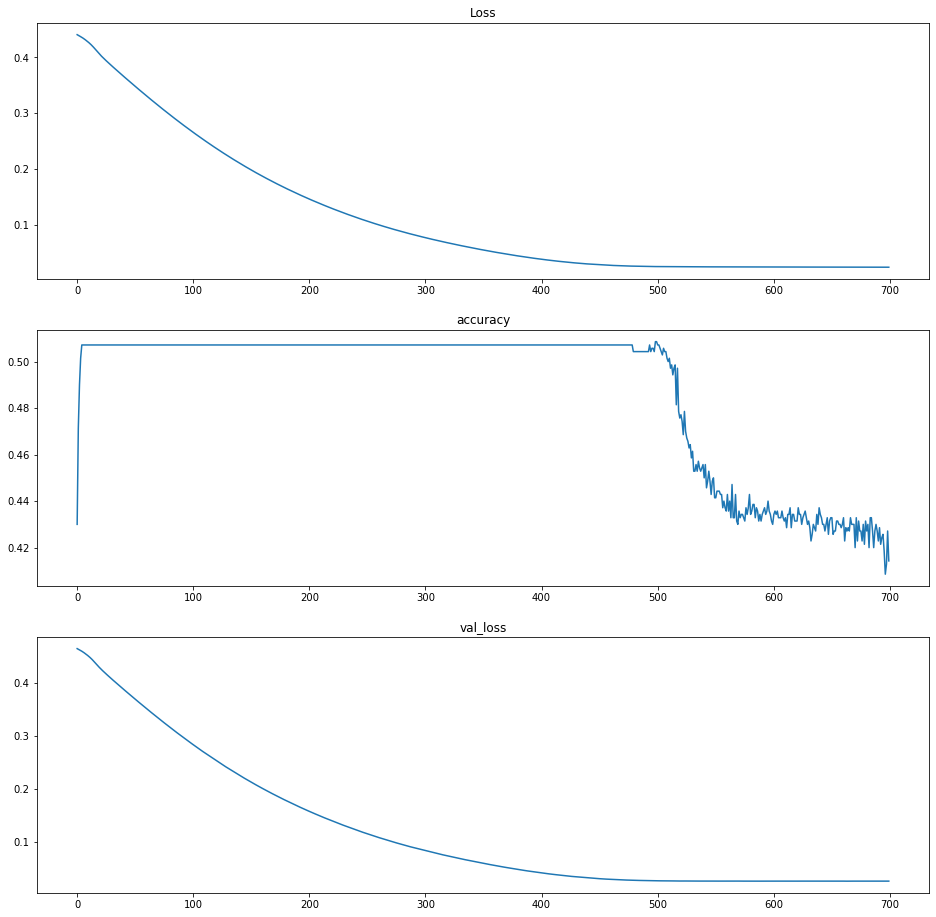

In [0]:
_,_=plt.subplots(figsize=(16,16))
plt.subplot(3,1,1)
plt.title('Loss')
plt.plot(hist.history['loss'])
plt.subplot(3,1,2)
plt.title('accuracy')
plt.plot(hist.history['accuracy'])
plt.subplot(3,1,3)
plt.title('val_loss')
plt.plot(hist.history['val_loss'])
plt.show()

Evaluating our model with testing data.

In [0]:
model.evaluate(testip,testop)

150/150 [==============================] - 0s 63us/sample - loss: 0.0293 - accuracy: 0.4867


[0.02932368353009224, 0.48666668]